# Requaired Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Load DataSet

In [4]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


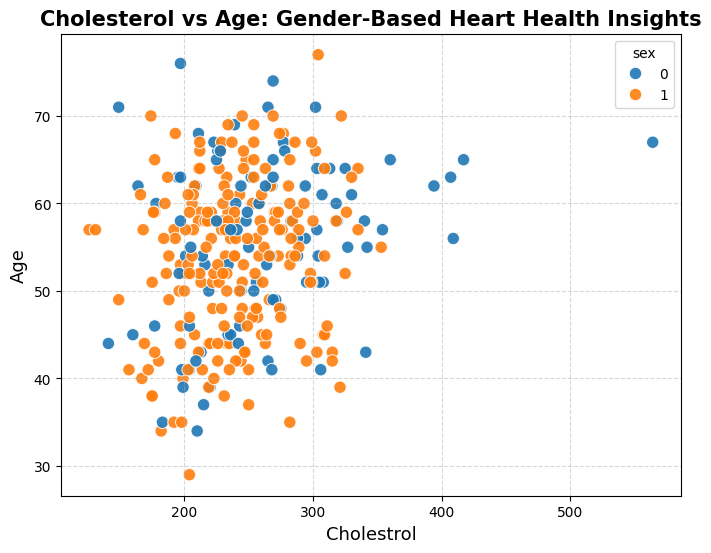

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='chol',y='age', hue='sex',s=80, alpha=0.9)
plt.title('Cholesterol vs Age: Gender-Based Heart Health Insights',fontsize=15
         ,fontweight='bold')
plt.xlabel('Cholestrol', fontsize=13)
plt.ylabel('Age',fontsize=13)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

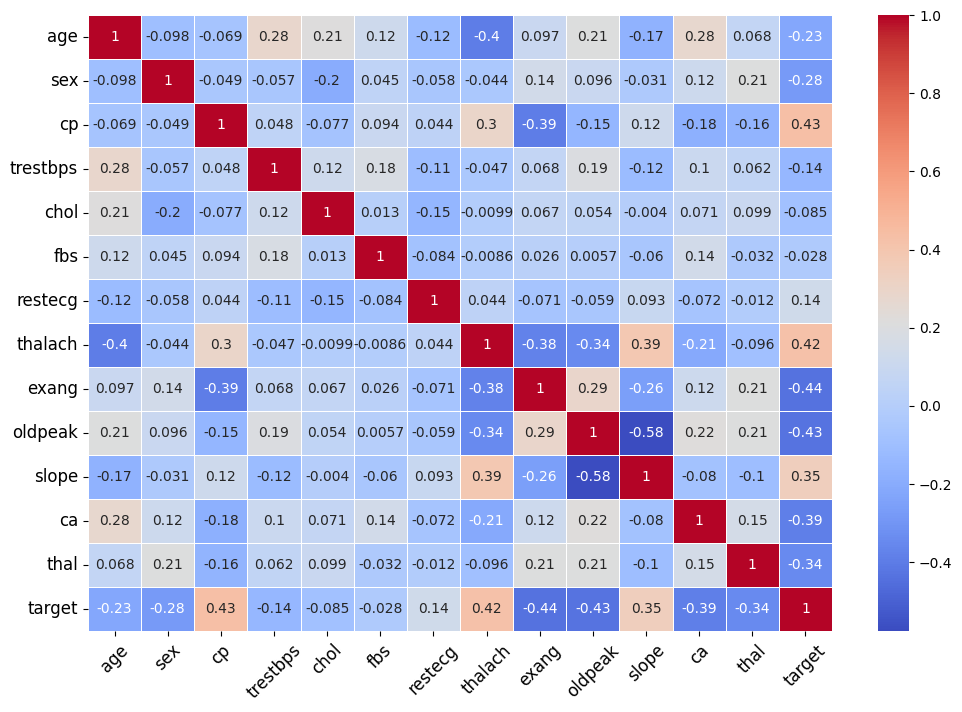

In [8]:
corr=df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidth=0.5)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
X=df.drop('target',axis=1)
y=df['target']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2
                                               ,random_state=42)

In [12]:
scaler=StandardScaler()
sX_train=scaler.fit_transform(X_train)
sX_test=scaler.transform(X_test)

In [13]:
model=LogisticRegression(max_iter=400)
model.fit(sX_train,y_train)
y_pred=model.predict(sX_test)


In [14]:
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy : 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



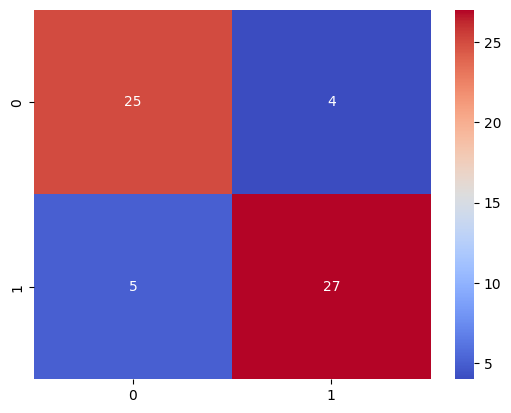

In [16]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [17]:
xgb=XGBClassifier(n_estimators=300, learning_rate=0.001,scale_pos_weight=1,max_depth=3, eval_metric='logloss',objective='binary:logistic',subsample=0.3,random_state=42,booster='gbtree')
xgb.fit(sX_train,y_train)
xgb_pred=xgb.predict(sX_test)

In [19]:
accuracy=accuracy_score(y_test, xgb_pred)
print("Accuracy :",accuracy)
print('Classification Report:')
print(classification_report(y_test,xgb_pred))

Accuracy : 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        29
           1       0.84      0.97      0.90        32

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.90      0.89      0.88        61



In [16]:
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


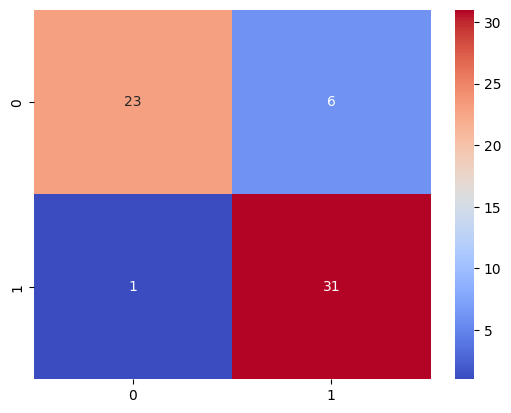

In [21]:
cm=confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

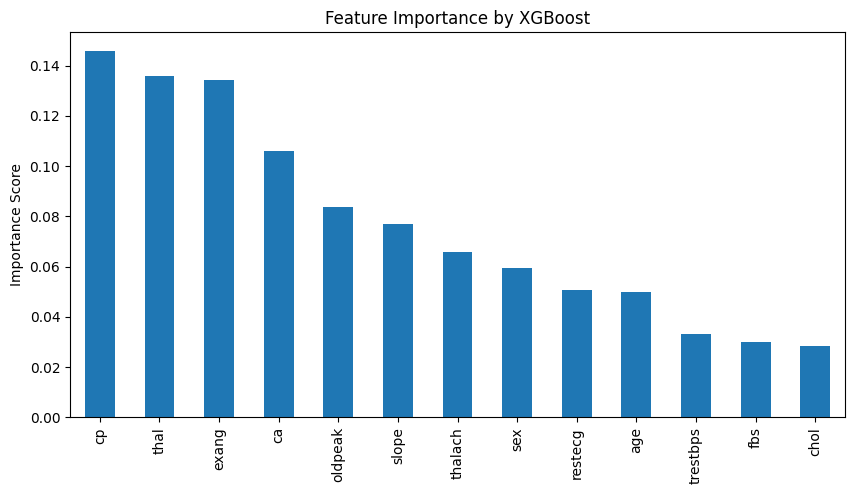

In [18]:
feature_importance=pd.Series(xgb.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title("Feature Importance by XGBoost")
plt.ylabel("Importance Score")
plt.show()
